# 第4章 数据分析--深入理解

在这一章里，我们将探讨以下主题
- 抽取主成分
- 使用核PCA
- 用奇异值分解抽取特征
- 用随机映射给数据降维
- 用非负矩阵分解（Non-negative Matrix Factorization，NMF）分解特征矩阵

## 4.1 简介

## 4.2 抽取主成分

#### 4.2.1 准备工作

**PCA通过以下步骤来完成目标**
1. 将数据集标准化成均值为0。
2. 找出数据集的相关矩阵和单位标准偏差值。
3. 将相关矩阵分解成它的特征向量和值。
4. 基于降序的特征值选择Top-N特征向量。
5. 投射输入的特征向量矩阵到一个新的子空间。

#### 4.2.2 操作方法

Eigen values 
[ 2.91081808+0.j  0.92122093+0.j  0.14735328+0.j  0.02060771+0.j]

 Eigen vectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


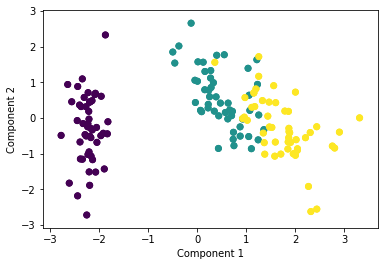

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
import scipy
import matplotlib.pyplot as plt

# 加载Iris数据集
data = load_iris()
x = data['data']
y = data['target']

# 因为PCA是一种无监督的方法，我们无需使用目标变量y
# 对数据进行缩放，使均值为0，标准差为1
x_s = scale(x,with_mean=True,with_std=True,axis=0)

# 计算相关矩阵
x_c = np.corrcoef(x_s.T)

# 从相关矩阵中找到特征值和特征向量
eig_val,r_eig_vec = scipy.linalg.eig(x_c)
print("Eigen values \n%s"%(eig_val))
print("\n Eigen vectors \n%s"%(r_eig_vec))

# 选择最前两个特征向量
w = r_eig_vec[:,0:2]

# 用合适的特征向量将原来四维的数据集降为二维。
x_rd = x_s.dot(w)

# 画出新的二维的散点图
plt.figure(1)
plt.scatter(x_rd[:,0],x_rd[:,1],c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

#### 4.2.3 工作原理

#### 4.2.4 更多内容

之前我们提到要介绍几个帮助我们确定该选择多少成分的方法。这个小节里，我们总结了两种，下面列出了一些关于选择成分的经验。
1. **特征值标准**  

特征值为1，这意味着这个成分可以解释一个变量的变化价值。依据这个标准，一个成分应该至少解释一个变量的变化价值。我们必须采用值大于或等于1的特征值，你可以根据数据集来设置这个阀值。在一个维度非常高的数据集中，如果一个成分只能解释一个变量，那是远远不够的。
2. **变化的比例评判标准**  

